In [ ]:
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

# Inshore wave data for Narrabeen Beach

Since March 2016, an archive of inshore wave information has been made available, currently spanning the fixed period of 1979-2014 from the **Narrabeen-Collaroy Beach Survey Program**.

All data can be downloaded from the Narrabeen data repository: http://narrabeen.wrl.unsw.edu.au.

In [1]:
import requests
import io
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
from pylab import *

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Loading the dataset


The data has already been downloaded for you and consists of a `.csv` files (comma-separated values). 

This is a commonly used data format that opens easily in a range of software programs such as Notepad, Microsoft Excel, and obviously Python.


In [2]:
names = [
    "Profile",
    "date",
    "Hs",
    "Tp",
    "Dir",
    "Flag"
]
url = 'https://drive.google.com/uc?id=1V2zH5ILOBRp2PXBsHFi98NvRFJxGE4hA'
df = pd.read_csv(url, encoding="utf8", names=names, skiprows=1)

dates = pd.to_datetime(df['date'], format = '%d/%m/%Y %H:%M')

# Append a new column at the end of our iribarren values
df["time"] = dates

# Plotting significant wave height

Plot the inshore wave data, showing significant wave height...

In [3]:
def plotHsSeries(PID, start_date, end_date):
    
    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    df_time = df.loc[mask]
    
    MyDateFormatter = DateFormatter('%d-%b')
    fig = plt.figure(figsize=(11,4), dpi=160) 
    ax1 = fig.add_subplot(111)
    
    for k in range(len(PID)):
        ids1 = np.where(df_time.Profile==PID[k])[0]
        ax1.plot(df_time['time'].iloc[ids1],df_time['Hs'].iloc[ids1],linewidth=1,label=PID[k]) 

    locator = mdates.AutoDateLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(MyDateFormatter)
    ax1.grid(True)
    setp(gca().get_xticklabels(), rotation=0, horizontalalignment='center')
    ax1.set_ylabel('$H_s$ (m)')
    ax1.legend()
    
    plt.title('Narrabeen-Collaroy Wave Height from '+str(start_date)+' to '+str(end_date),fontsize=10)
    
    return

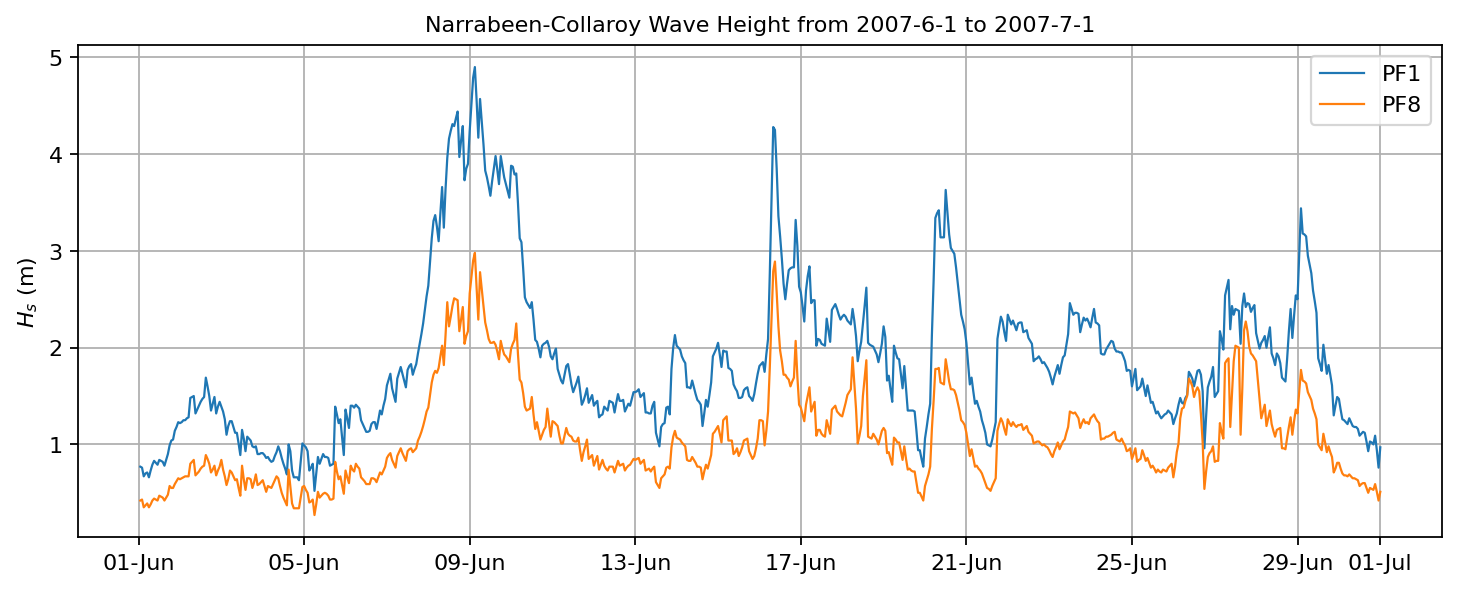

In [4]:
plotHsSeries(PID=['PF1','PF8'], start_date = '2007-6-1', end_date = '2007-7-1')

# Plotting significant wave period

Plot the inshore wave data, showing peak wave period (Tp)...

In [5]:
def plotTpSeries(PID, start_date, end_date):
    
    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    df_time = df.loc[mask]
    
    MyDateFormatter = DateFormatter('%d-%b')
    fig = plt.figure(figsize=(11,4), dpi=160) 
    ax1 = fig.add_subplot(111)
    
    ids1 = np.where(df_time.Profile==PID)[0]
    ax1.plot(df_time['time'].iloc[ids1],df_time['Tp'].iloc[ids1],linewidth=1,label=PID,color='k') 

    locator = mdates.AutoDateLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(MyDateFormatter)
    ax1.grid(True)
    setp(gca().get_xticklabels(), rotation=0, horizontalalignment='center')
    ax1.set_ylabel('$T_p$ (s)')
    ax1.legend()
    plt.title('Narrabeen-Collaroy Wave Height from '+str(start_date)+' to '+str(end_date),fontsize=10)
    
    return

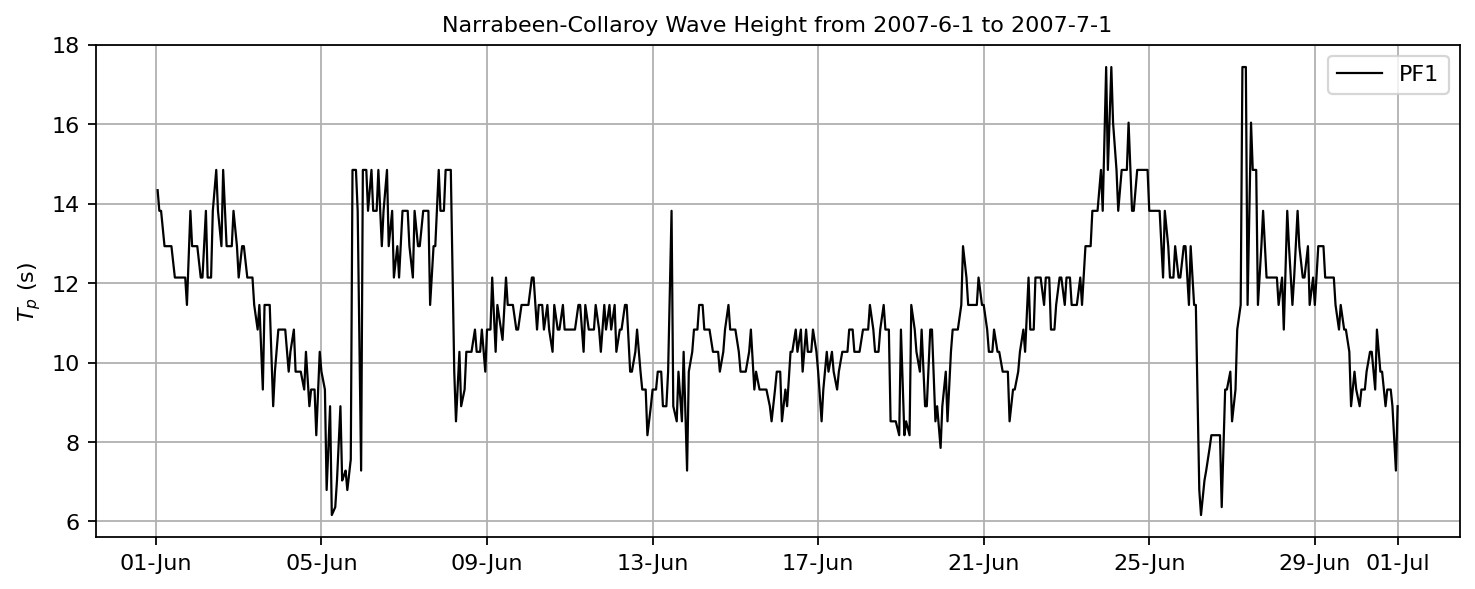

In [6]:
plotTpSeries(PID='PF1', start_date = '2007-6-1', end_date = '2007-7-1')

# Plotting wave direction

Plot the inshore wave data, showing wave direction...

In [7]:
def plotDirSeries(PID, start_date, end_date):
    
    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    df_time = df.loc[mask]
    
    MyDateFormatter = DateFormatter('%d-%b')
    fig = plt.figure(figsize=(11,4), dpi=160) 
    ax1 = fig.add_subplot(111)
    
    for k in range(len(PID)):
        ids1 = np.where(df_time.Profile==PID[k])[0]
        ax1.plot(df_time['time'].iloc[ids1],df_time['Dir'].iloc[ids1],'.',label=PID[k], markersize=2) 

    locator = mdates.AutoDateLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(MyDateFormatter)
    ax1.grid(True)
    setp(gca().get_xticklabels(), rotation=0, horizontalalignment='center')
    ax1.set_ylabel('Dir ($^o$)')
    ax1.legend()
    plt.title('Narrabeen-Collaroy Wave Direction from '+str(start_date)+' to '+str(end_date),fontsize=10)
    
    return

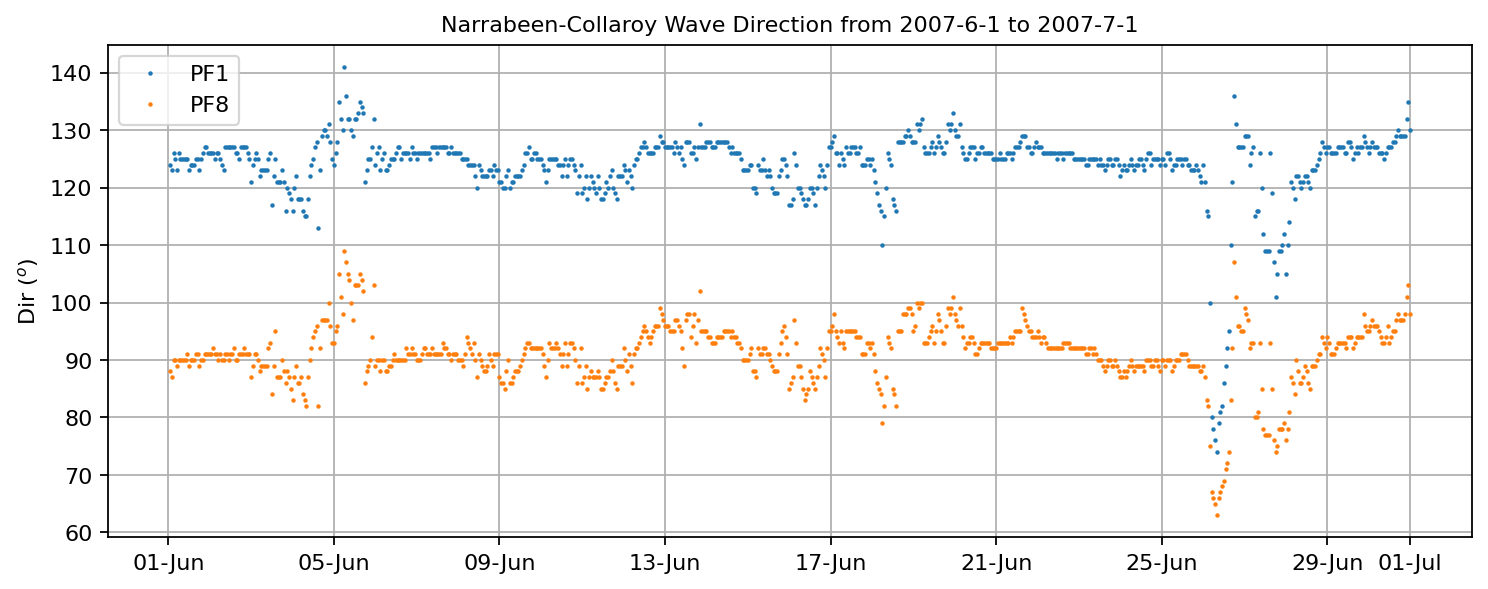

In [8]:
plotDirSeries(PID=['PF1','PF8'], start_date = '2007-6-1', end_date = '2007-7-1')

In [9]:
rho = 1025  # Seawater density (kg/m³)
g = 9.81  # Gravity (m/s²)
wave_energy = (rho * g**2 / (64 * np.pi)) * Hm0**2 * Tm01

NameError: name 'Hm0' is not defined